In [59]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [61]:
# 1. Data Selection
try:
    data = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')

    print("Columns available:", data.columns.tolist())

except FileNotFoundError:
    print("Error: Dataset file not found.")
    exit()

Columns available: ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [62]:
print("\nFirst 5 Rows")
print(data.head(5))


First 5 Rows
   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2        

In [63]:
# 2. Statistical Summary
print("\nDataset Information")
data.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                    

In [64]:
print("\nStatistical Summary of Numerical Variables")
print(data.describe())


Statistical Summary of Numerical Variables
         Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   

In [ ]:
print("\nFrequency Distributions of Categorical Variables")
for column in data.select_dtypes(include='object').columns:
    print(f"\n{column} Distribution")
    print(data[column].value_counts())
    print(f"Total: {data[column].count()}")
    print(f"Rates:\n{data[column].value_counts(normalize=True) * 100}")


Frequency Distributions of Categorical Variables

Gender Distribution
Gender
Female    13172
Male      12804
Name: count, dtype: int64
Total: 25976
Rates:
Gender
Female    50.708346
Male      49.291654
Name: proportion, dtype: float64

Customer Type Distribution
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64
Total: 25976
Rates:
Customer Type
Loyal Customer       81.525254
disloyal Customer    18.474746
Name: proportion, dtype: float64

Type of Travel Distribution
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64
Total: 25976
Rates:
Type of Travel
Business travel    69.441022
Personal Travel    30.558978
Name: proportion, dtype: float64

Class Distribution
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64
Total: 25976
Rates:
Class
Business    48.102094
Eco         44.518017
Eco Plus     7.379889
Name: proportion, dtype: float64

satisfaction Distribution
satisfact

In [ ]:
# 3. Missing Value Analysis
print("\nMissing Value Detection")
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
print(missing_df[missing_df['Missing Count'] > 0])

print("\nApproaches for Missing Values")

#print("1. 'Arrival Delay in Minutes' değişkeni sayısal bir değişkendir ve ortalama ile doldurulmuştur.")
#print("   - Yaklaşım: Ortalama (Mean) ile doldurma. Bu yöntem, verinin genel dağılımını korurken eksik değerleri basitçe tamamlar.")
#print("   - Gerekçe: Gecikme süreleri genellikle ortalama etrafında kümelenir ve ekstrem değerler (outlierlar) daha azdır.")
#print("2. Kategorik değişkenler için 'Unknown' veya 'Mode' ile doldurma düşünülebilir.")
#print("   - Mevcut kodda, 'Arrival Delay in Minutes' dışındaki eksik değerler 'Unknown' olarak doldurulmuştur (eğer varsa).")
#print("   - Gerekçe: Kategorik değişkenlerde ortalama kullanımı anlamsızdır. Mod (en sık tekrar eden değer) veya 'Unknown' gibi ayrı bir kategori olarak işaretleme, bilgi kaybını önleyebilir ve modelin bu eksikliği öğrenmesine olanak tanır.")

print("\nImputation of Missing Values")
# Impute numerical missing values with the mean
# It's important to do this *before* outlier detection if outliers significantly skew the mean.
# However, the user's original code imputes first, so we follow that for consistency.
data.fillna(data.mean(numeric_only=True), inplace=True)

# Impute categorical missing values (if any remain, though test.csv generally has only 'Arrival Delay in Minutes' missing)
# This line was present in the user's code, useful if other categorical columns had NaNs.
data.fillna("Unknown", inplace=True)



Missing Value Detection
                          Missing Count  Missing Percentage (%)
Arrival Delay in Minutes             83                0.319526

Approaches for Missing Values

Imputation of Missing Values



Outlier Analysis on Numerical Variables


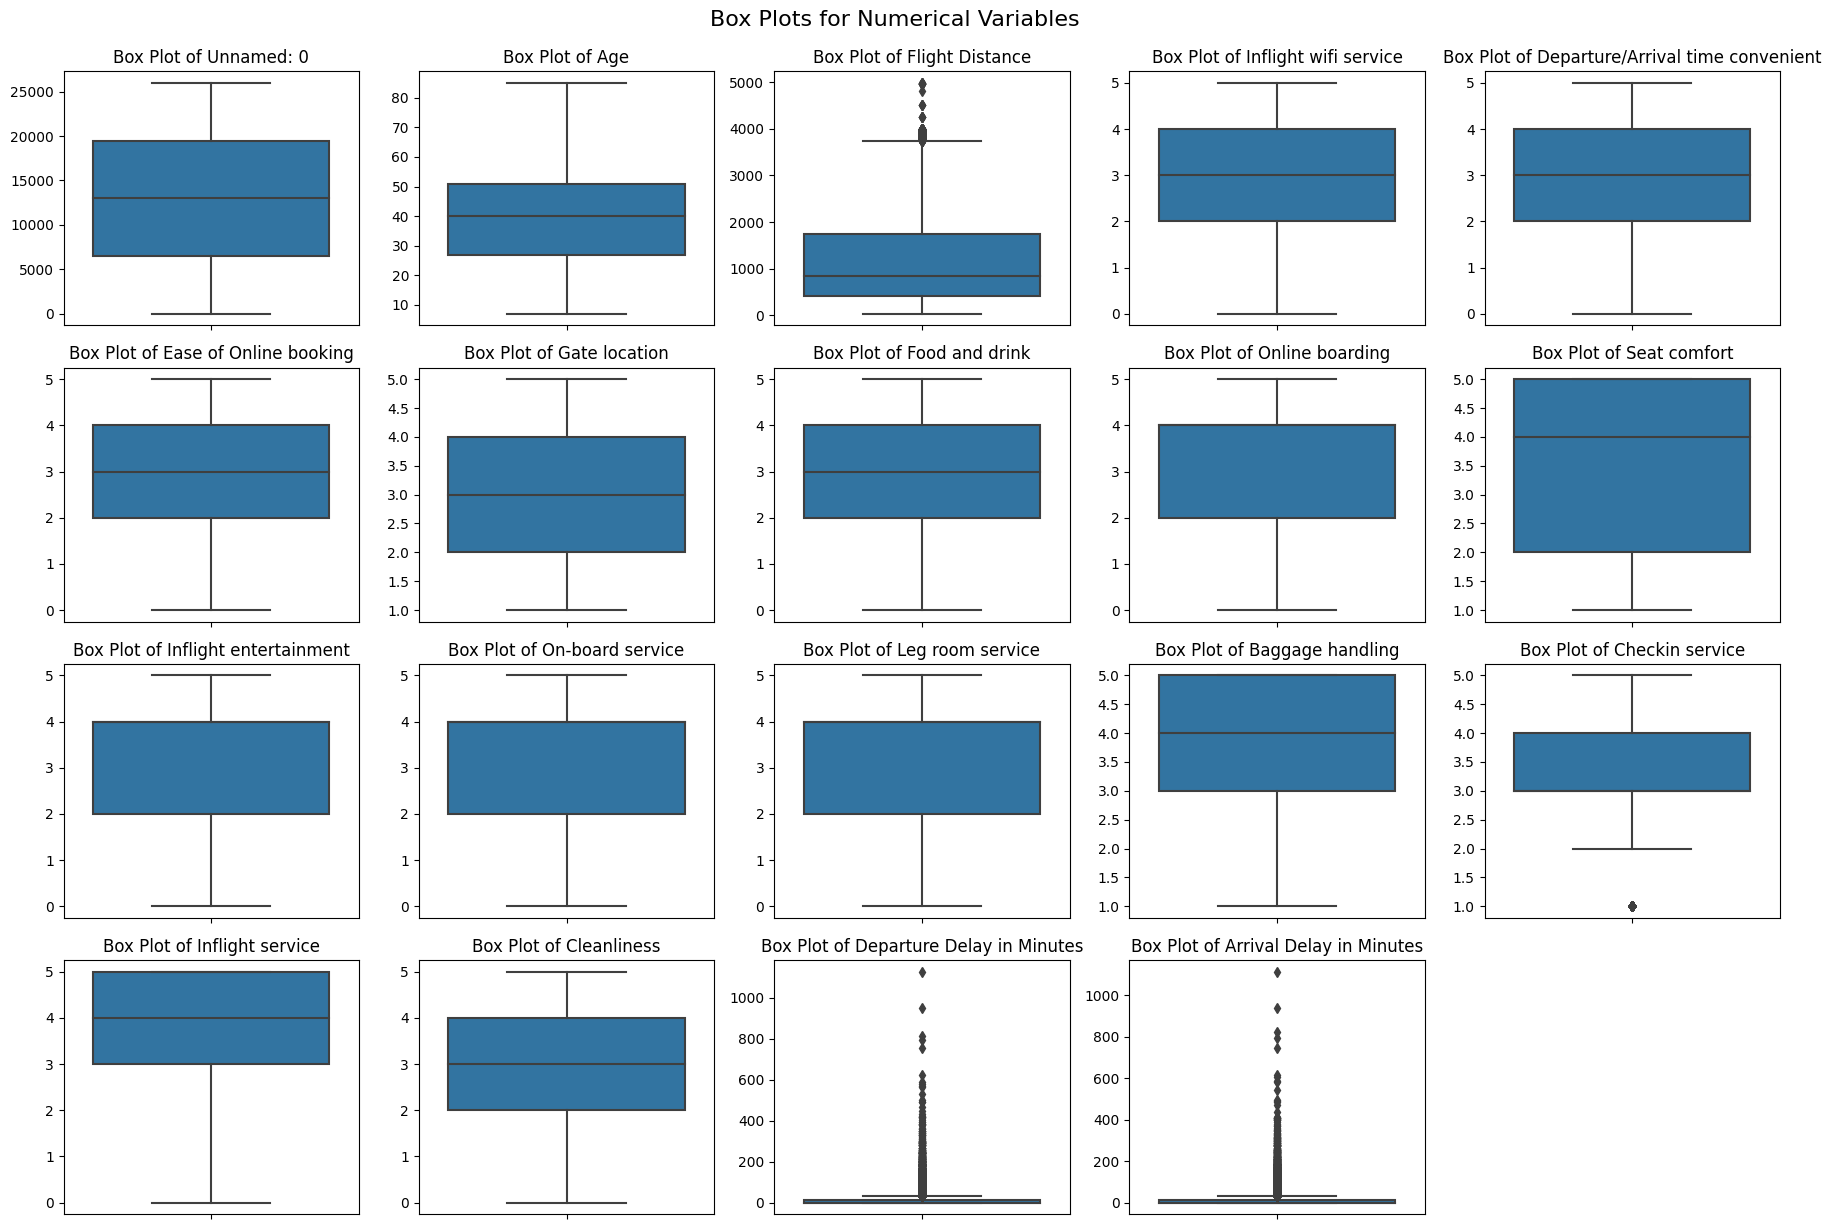


Outlier Detection using IQR Method

Variable: Flight Distance
  Lower Bound: -1581.00
  Upper Bound: 3739.00
  Outlier Count: 584
  Outlier Percentage: 2.25%
  Example Outliers: [3987, 3799, 3769, 3823, 3947]

Variable: Checkin service
  Lower Bound: 1.50
  Upper Bound: 5.50
  Outlier Count: 3218
  Outlier Percentage: 12.39%
  Example Outliers: [1, 1, 1, 1, 1]

Variable: Departure Delay in Minutes
  Lower Bound: -18.00
  Upper Bound: 30.00
  Outlier Count: 3569
  Outlier Percentage: 13.74%
  Example Outliers: [50, 77, 117, 40, 80]

Variable: Arrival Delay in Minutes
  Lower Bound: -19.50
  Upper Bound: 32.50
  Outlier Count: 3538
  Outlier Percentage: 13.62%
  Example Outliers: [44.0, 65.0, 113.0, 49.0, 68.0]


In [67]:
# 4. Outlier Analysis
print("\nOutlier Analysis on Numerical Variables")

# Define numerical columns for outlier analysis (excluding 'id' and potential encoded columns later)
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# Exclude 'id' as it's an identifier, and potentially already encoded 'Gender', 'Customer Type', etc.
# For now, we'll exclude columns that will be target or already one-hot encoded and not truly continuous.
# Let's consider actual continuous/discrete numerical features that could have outliers.
# Based on data.info(), potential numerical features are: 'Age', 'Flight Distance', 'Inflight wifi service', etc.
# Let's remove 'id', and the target 'satisfaction' for this analysis, also 'Gender', 'Customer Type', 'Type of Travel', 'Class' after encoding.
# For pre-encoding outlier analysis, we just remove 'id' and 'satisfaction' (if it's numerical, which it becomes after encoding).
numerical_features_for_outliers = [col for col in numerical_cols if col not in ['id', 'satisfaction']]


plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_outliers):
    plt.subplot(4, 5, i + 1) # Adjust subplot grid based on number of numerical features
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label for cleaner look
plt.tight_layout()
plt.suptitle('Box Plots for Numerical Variables', y=1.02, fontsize=16)
plt.show()

print("\nOutlier Detection using IQR Method")
outlier_report = {}
for col in numerical_features_for_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        outlier_report[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': len(outliers),
            'Outlier Percentage': (len(outliers) / len(data)) * 100,
            'Example Outliers': outliers[col].values[:5].tolist() # Show first 5 examples
        }

if outlier_report:
    for col, details in outlier_report.items():
        print(f"\nVariable: {col}")
        print(f"  Lower Bound: {details['Lower Bound']:.2f}")
        print(f"  Upper Bound: {details['Upper Bound']:.2f}")
        print(f"  Outlier Count: {details['Outlier Count']}")
        print(f"  Outlier Percentage: {details['Outlier Percentage']:.2f}%")
        print(f"  Example Outliers: {details['Example Outliers']}")
else:
    print("No outlier value.")


In [68]:
# Data Preprocessing
# Mapping categorical features to numerical
import warnings
warnings.filterwarnings('ignore')

print("\nMapping Categorical to Numerical")
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Type of Travel'] = data['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
data['Class'] = data['Class'].map({'Eco': 0, 'Business': 1, 'Eco Plus': 2})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

print("First 5 row after process:")
print(data.head())
print("\nData types after process:")
print(data.info())


Mapping Categorical to Numerical
First 5 row after process:
   Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0  19556       1              0   52               0      0   
1           1  90035       1              0   36               0      1   
2           2  12360       0              1   20               0      0   
3           3  77959       0              0   44               0      1   
4           4  36875       1              0   49               0      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   ... 


Data Visualizations

Histograms and Density Plots for Numerical Variables


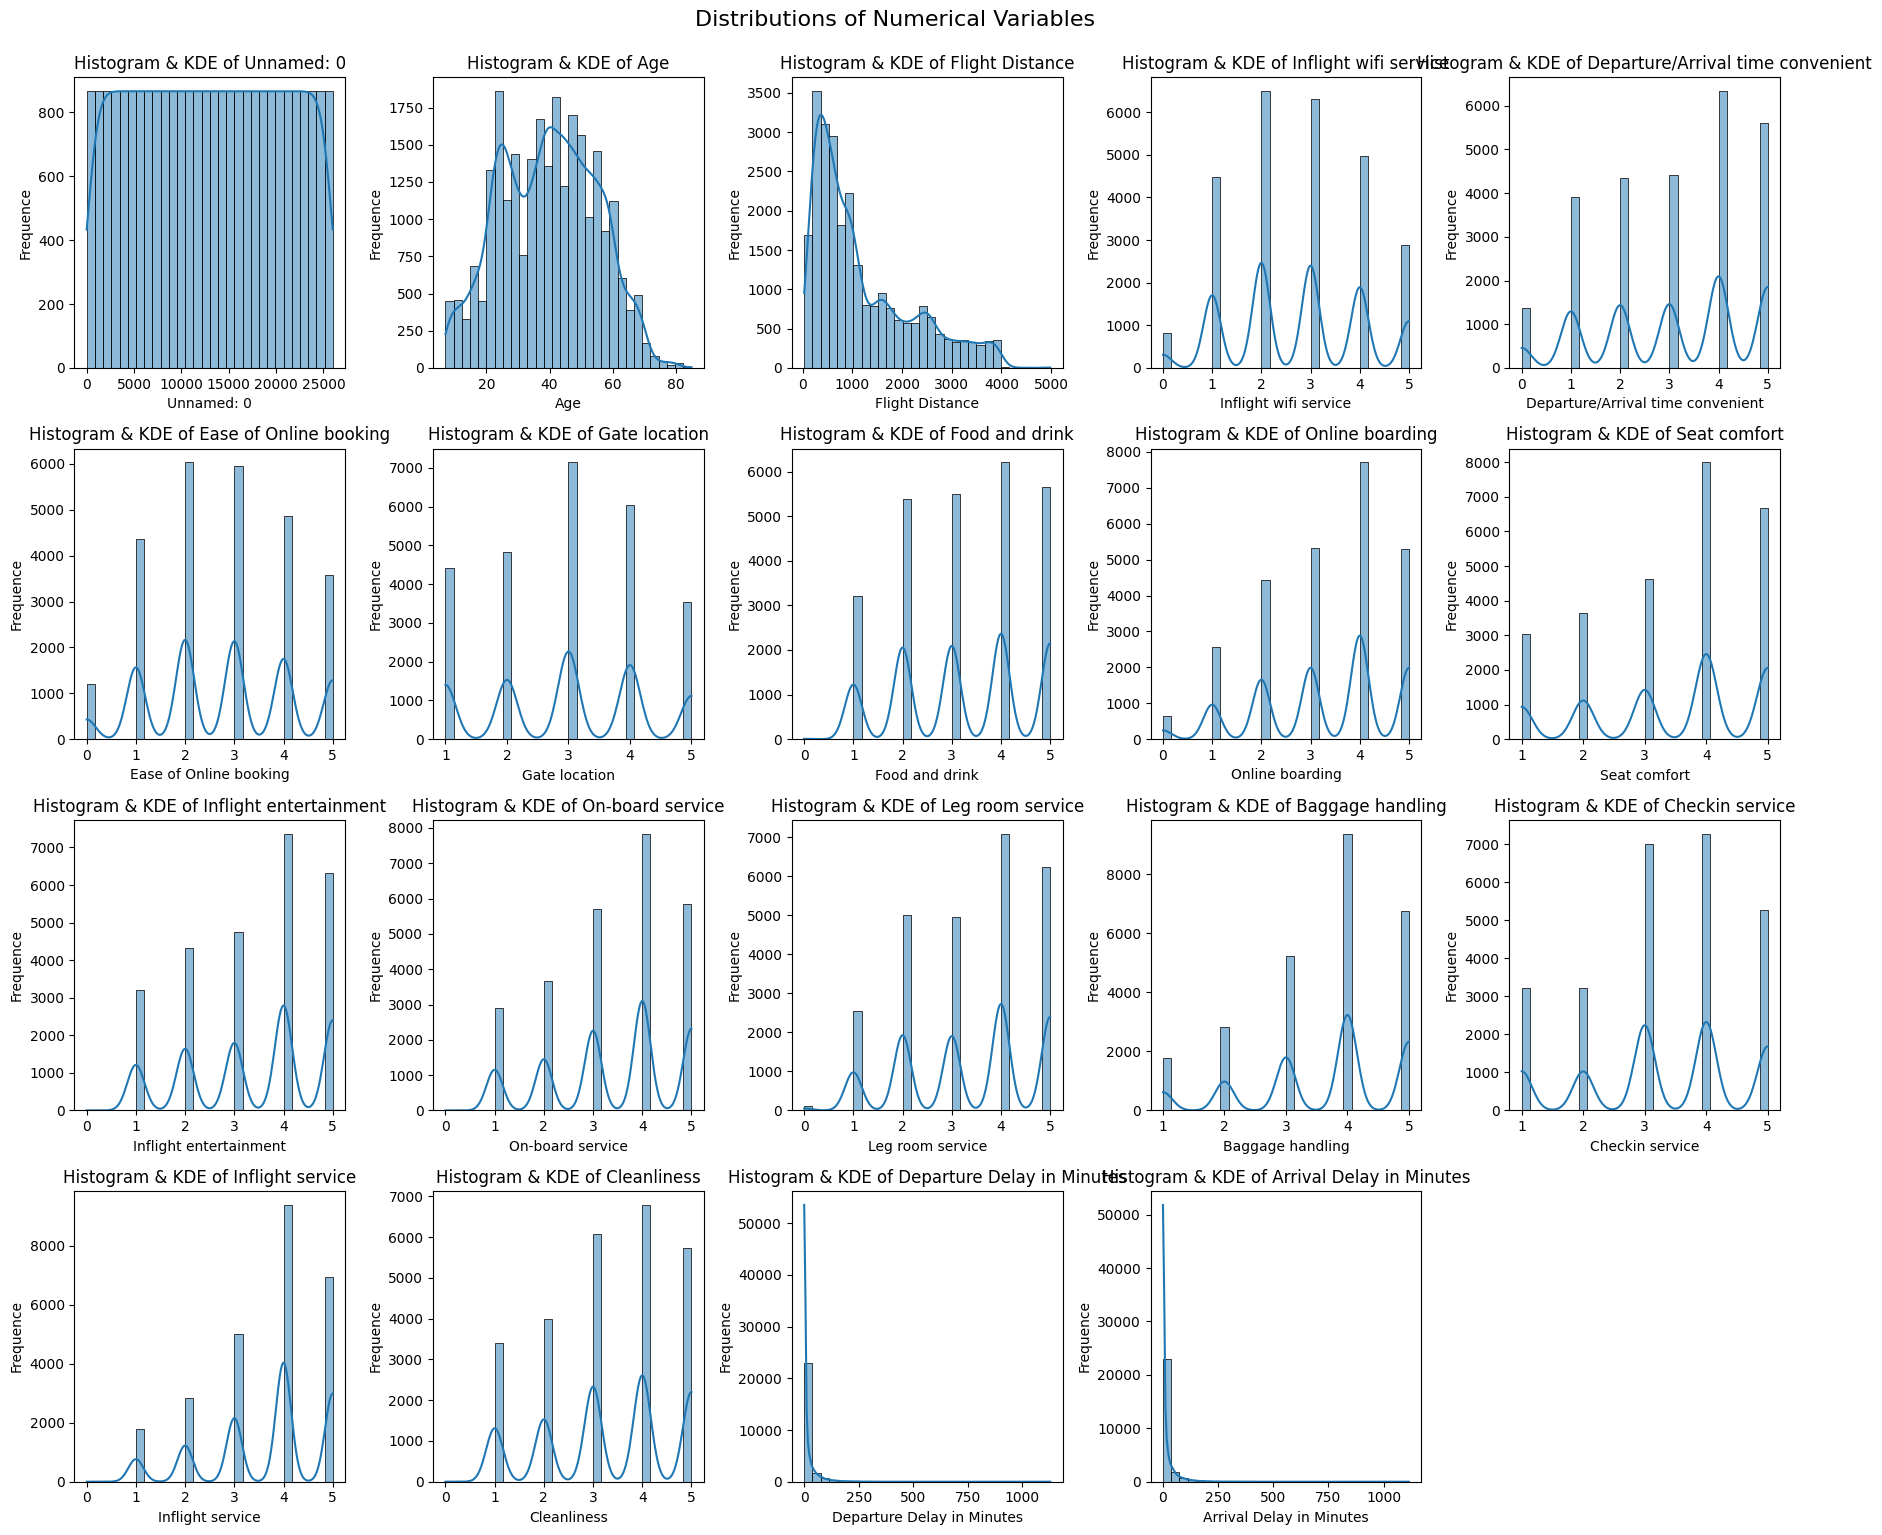

In [69]:
# 5.Visualization
print("\nData Visualizations")

# Histograms and Density Plots for Numerical Variables
print("\nHistograms and Density Plots for Numerical Variables")
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_features_for_outliers): # Use the same numerical features as before
    plt.subplot(4, 5, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequence')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Variables', y=1.02, fontsize=16)
plt.show()


Bar Plots for Categorical Variables


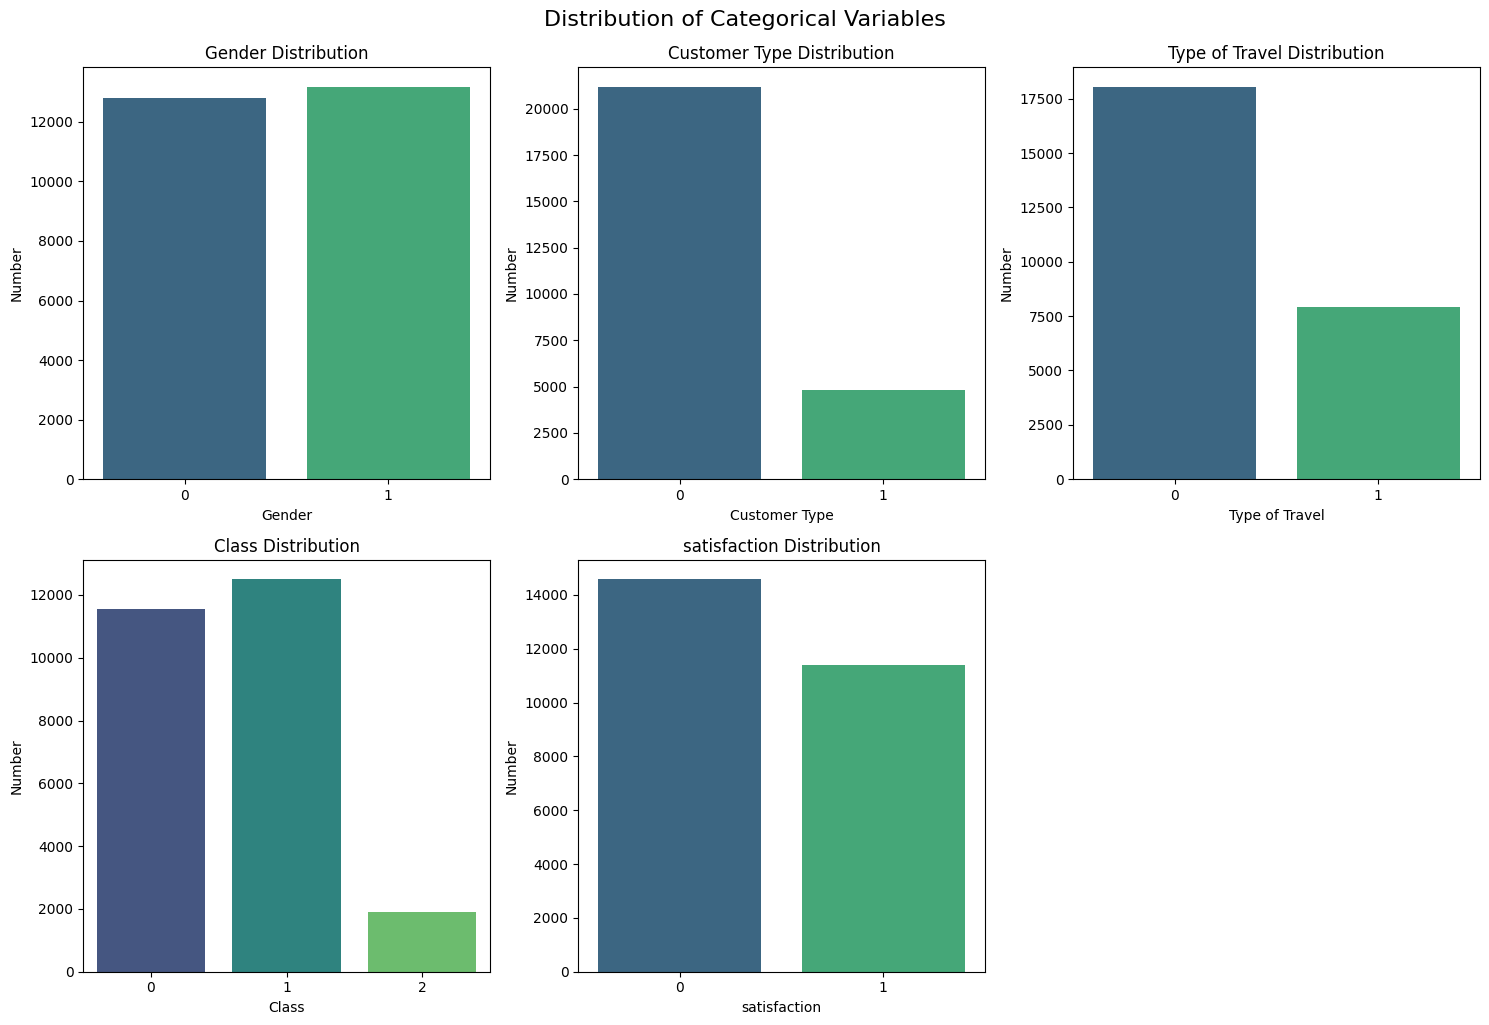

In [70]:
#Count Plots for Categorical Variables
print("\nBar Plots for Categorical Variables")
categorical_cols_for_plot = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_for_plot):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Number')
plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)
plt.show()


Relationships between Numerical and Categorical Variables


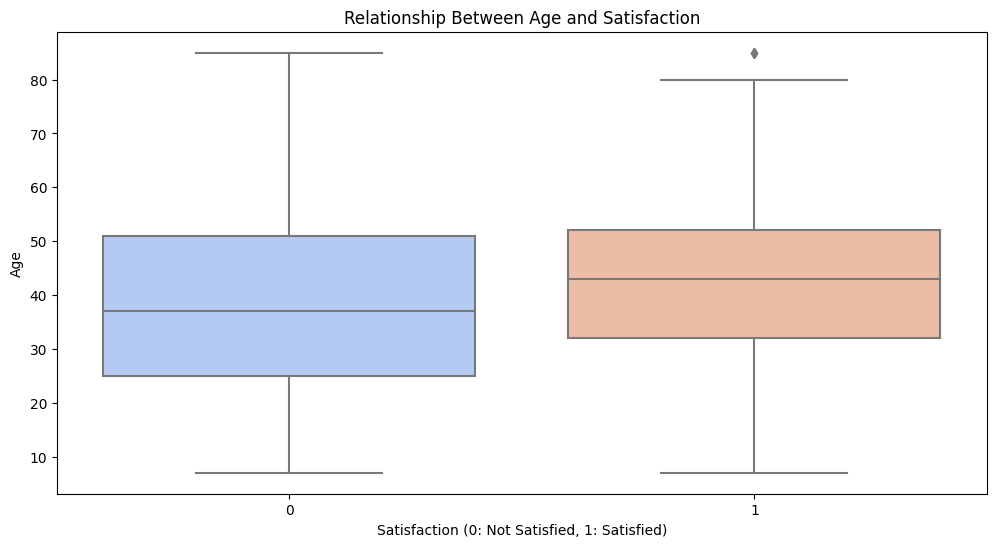

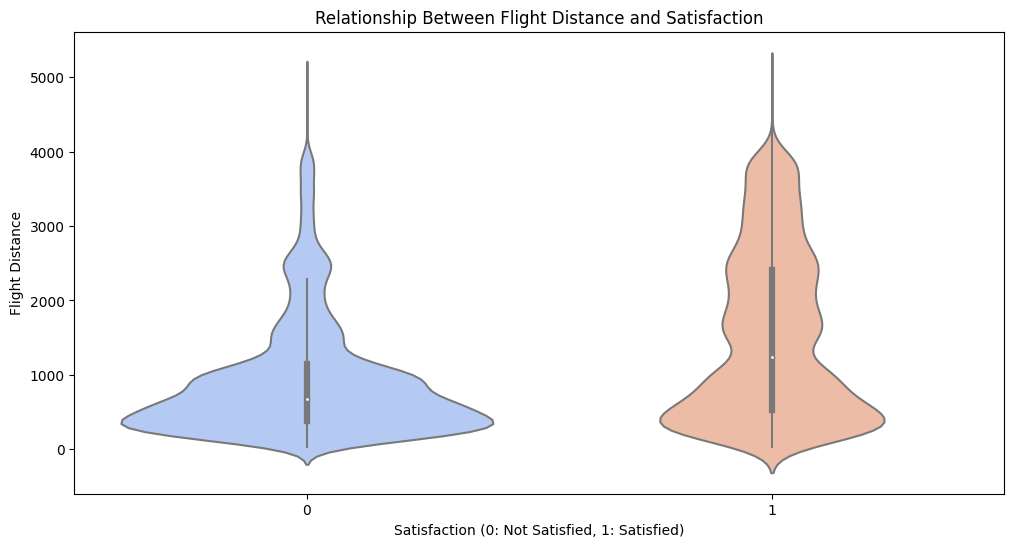

In [71]:
# Relationships Between Numerical and Categorical Variables
print("\nRelationships between Numerical and Categorical Variables")
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction', y='Age', data=data, palette='coolwarm')
plt.title('Relationship Between Age and Satisfaction')
plt.xlabel('Satisfaction (0: Not Satisfied, 1: Satisfied)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='satisfaction', y='Flight Distance', data=data, palette='coolwarm')
plt.title('Relationship Between Flight Distance and Satisfaction')
plt.xlabel('Satisfaction (0: Not Satisfied, 1: Satisfied)')
plt.ylabel('Flight Distance')
plt.show()


Correlation Matrix of Numerical Variables


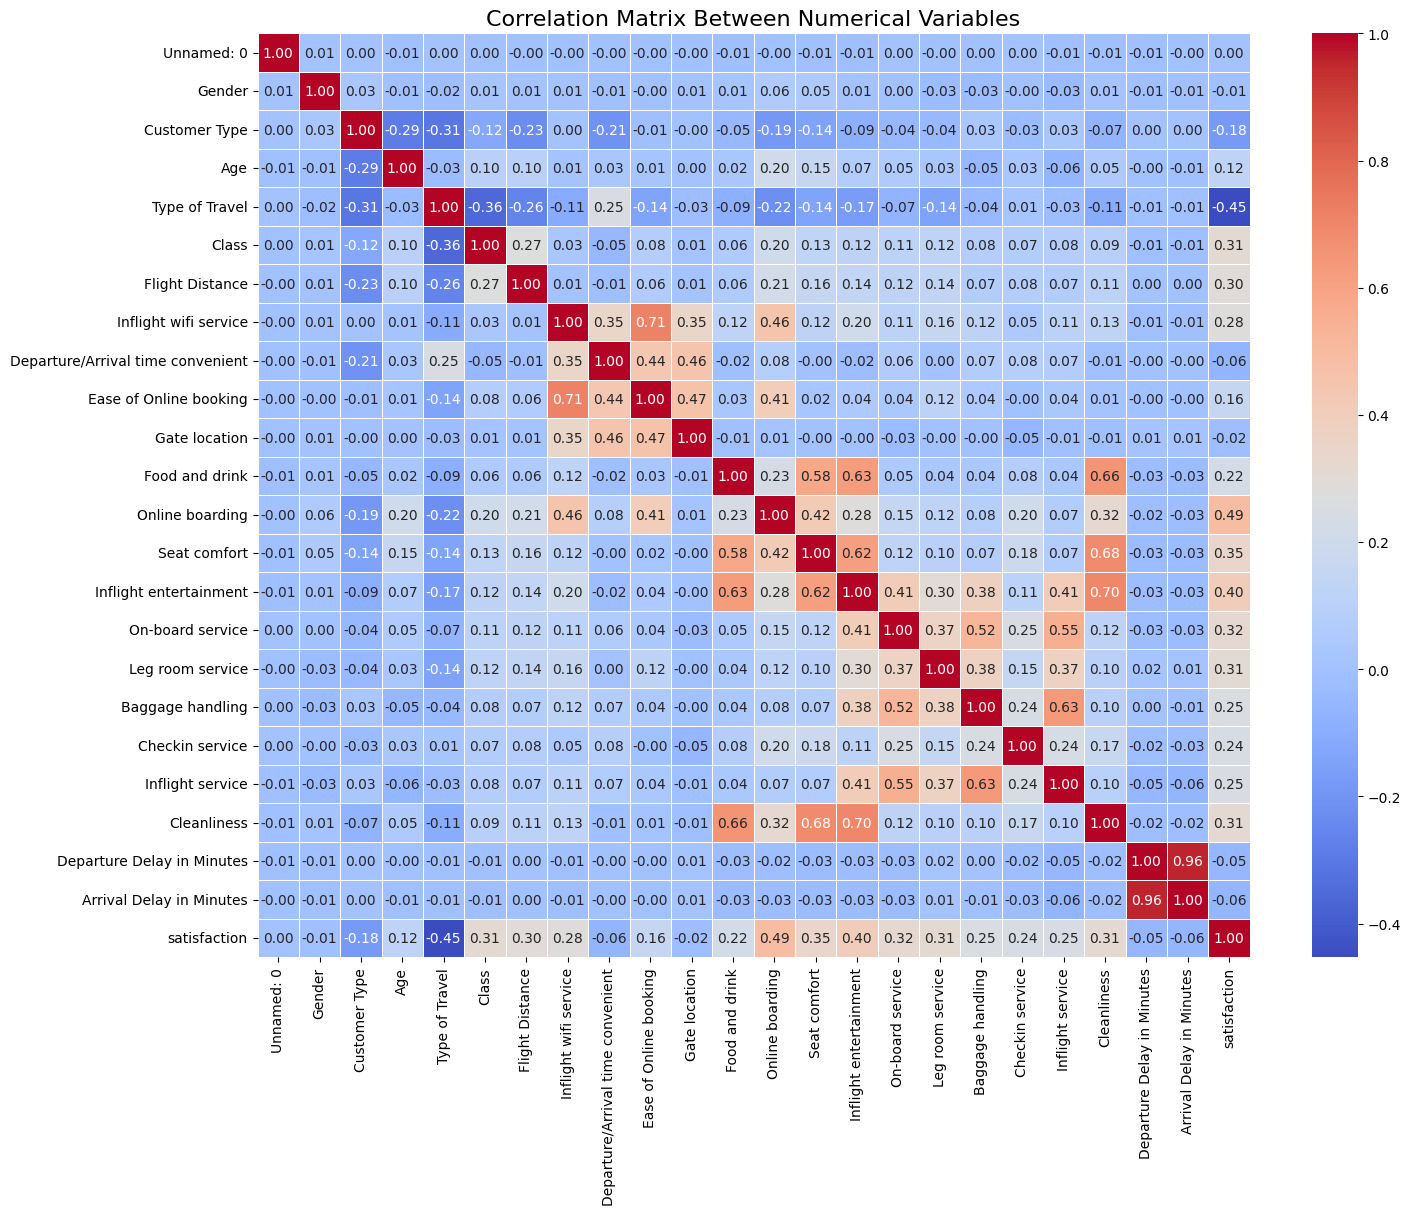

In [72]:
# Correlation Matrix
print("\nCorrelation Matrix of Numerical Variables")
# Exclude 'id' from correlation calculation
correlation_data = data.drop('id', axis=1)
# Ensure all columns are numeric for correlation matrix (after encoding)
numeric_correlation_data = correlation_data.select_dtypes(include=np.number)

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Between Numerical Variables', fontsize=16)
plt.show()

In [73]:
# Model Training and Evaluation
print("\nModel Training and Evaluation")

# Drop 'id' column as it's not a feature for the model
X = data.drop(['satisfaction', 'id'], axis=1) # Drop 'id' from features
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model Training and Evaluation


In [74]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

print("\nModel Performance")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Performance
Accuracy: 0.9271
Precision: 0.9163
Recall: 0.9157
F1-Score: 0.9160

Confusion Matrix:
 [[4128  283]
 [ 285 3097]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4411
           1       0.92      0.92      0.92      3382

    accuracy                           0.93      7793
   macro avg       0.93      0.93      0.93      7793
weighted avg       0.93      0.93      0.93      7793

